In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process
import multiprocessing
import librosa
import IPython.display as ipd
import librosa.display
import sklearn

In [6]:
filename=os.listdir('/home/pravinshankar1/audios')
filename.remove('099134.mp3')#unreadable audio
filename.remove('108925.mp3')#unreadable audio
filename.remove('133297.mp3')#unreadable audio
filename.remove('checksums')#not audio
filename.remove('README.txt')#not audio
len(filename)

7997

In [7]:
#remvoing .mp3 and converting name of audio as int so that we can use it for ordering
name=[]
for i in filename:
    name.append(int(i.split('.')[0])) 

In [8]:
order=np.argsort(name) #ordering based on audio name. eg: 02,05,10,...

In [9]:
#filename ordered based on its name
order_filename=[]
for i in order:
    order_filename.append(filename[i])

In [10]:
order_filename[0:10]

['000002.mp3',
 '000005.mp3',
 '000010.mp3',
 '000140.mp3',
 '000141.mp3',
 '000148.mp3',
 '000182.mp3',
 '000190.mp3',
 '000193.mp3',
 '000194.mp3']

In [11]:
np.save('order_filename', order_filename)

In [12]:
order_filename=np.load('order_filename.npy')

## FMA_features:

In [5]:
features = pd.read_csv('features.csv', index_col=0, header=[0, 1])
features.head()

,"(chroma_cens, kurtosis)","('chroma_cens', 'kurtosis').1","('chroma_cens', 'kurtosis').2","('chroma_cens', 'kurtosis').3","('chroma_cens', 'kurtosis').4","('chroma_cens', 'kurtosis').5","('chroma_cens', 'kurtosis').6","('chroma_cens', 'kurtosis').7","('chroma_cens', 'kurtosis').8","('chroma_cens', 'kurtosis').9",...,"('tonnetz', 'std').3","('tonnetz', 'std').4","('tonnetz', 'std').5","(zcr, kurtosis)","(zcr, max)","(zcr, mean)","(zcr, median)","(zcr, min)","(zcr, skew)","(zcr, std)"
number,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,4.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861


In [13]:
ind=features.index.values
ind=ind[2:]
ind

array(['2', '3', '5', ..., 155318, 155319, 155320], dtype=object)

In [14]:
features.loc['2'].values.shape

(518,)

In [16]:
#removing .mp3 from ordered filenames
name=[]
for i in order_filename:
    name.append(int(i.split('.')[0]))

In [17]:
FMA_features=np.zeros((7997,518))
array_index=0
for index in ind:
    if int(index) in name: #selecting only features of fma_small audios.
        FMA_features[array_index]=features.loc[index].values
        array_index+=1

In [20]:
FMA_features[0]

array([ 7.18065262e+00,  5.23030901e+00,  2.49320805e-01,  1.34762013e+00,
        1.48247778e+00,  5.31371236e-01,  1.48159301e+00,  2.69145465e+00,
        8.66868198e-01,  1.34123063e+00,  1.34779155e+00,  1.23765838e+00,
        6.92499936e-01,  5.69344044e-01,  5.97040892e-01,  6.25863731e-01,
        5.67329586e-01,  4.43949252e-01,  4.87976283e-01,  4.97327238e-01,
        5.74435472e-01,  5.79240680e-01,  6.20102465e-01,  5.86945415e-01,
        4.74300265e-01,  3.69815946e-01,  2.36118853e-01,  2.28067890e-01,
        2.22829998e-01,  2.21414834e-01,  2.29238048e-01,  2.48795316e-01,
        1.96245179e-01,  1.75809205e-01,  2.00712666e-01,  3.19971949e-01,
        4.82825249e-01,  3.87652487e-01,  2.49082074e-01,  2.38186926e-01,
        2.33066157e-01,  2.30120465e-01,  2.32068285e-01,  2.48895958e-01,
        1.97692201e-01,  1.73299640e-01,  1.98839664e-01,  3.14053059e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [21]:
np.save('FMA_features',FMA_features)

## Genre:

In [23]:
import pandas as pd
filepath = 'tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [24]:
#https://github.com/priya-dwivedi/Music_Genre_Classification/blob/master/load_fma_dataset.ipynb
keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

df_all = tracks[keep_cols]
df_all = df_all[df_all[('set', 'subset')] == 'small']
df_all.head()

set            track       
             split subset genre_top genres
track_id                                  
2         training  small   Hip-Hop   [21]
5         training  small   Hip-Hop   [21]
10        training  small       Pop   [10]
140       training  small      Folk   [17]
141       training  small      Folk   [17]

In [25]:
df_all=df_all[('track','genre_top')]

In [26]:
df_all.head()

track_id
2      Hip-Hop
5      Hip-Hop
10         Pop
140       Folk
141       Folk
Name: (track, genre_top), dtype: object

In [27]:
#remove unreadable songs' genre from dataframe
df_all=df_all.drop(108925,axis=0)
df_all=df_all.drop(133297,axis=0)
df_all=df_all.drop(99134,axis=0)

In [30]:
label=df_all.values

In [32]:
label[0:5]

array(['Hip-Hop', 'Hip-Hop', 'Pop', 'Folk', 'Folk'], dtype=object)

In [33]:
np.save('label',label)

In [23]:
label=np.load('label.npy',allow_pickle=True) 
#label is saved as dtype=object(and not str) hence allow_pickle is set to true is required.

In [35]:
from collections import Counter
Counter(label)

Counter({'Hip-Hop': 1000,
         'Pop': 1000,
         'Folk': 1000,
         'Experimental': 999,
         'Rock': 999,
         'International': 1000,
         'Electronic': 999,
         'Instrumental': 1000})

In [36]:
Counter(label).keys()

dict_keys(['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electronic', 'Instrumental'])

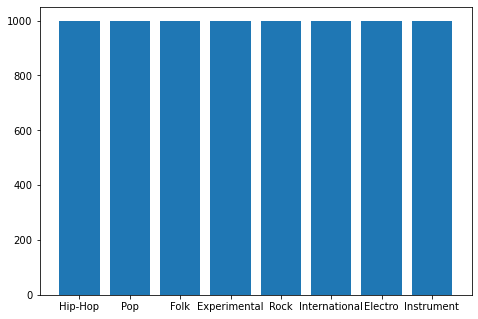

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Genre = ['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International', 'Electro', 'Instrument']
count = Counter(label).values()
ax.bar(Genre,count)
plt.show()

### Observation:
Balanced genres

## Metadata:

In [5]:
tracks=pd.read_csv('tracks.csv',index_col=0, header=[0, 1])

In [6]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [7]:
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [8]:
tracks=tracks[tracks[( 'set','subset')]=='small'] #selecting metadata of fma_small audios

In [9]:
#selecting only relevant columns
tracks=tracks[[( 'album',     'date_released'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
            ('artist',         'longitude'),
            ( 'track',          'duration'),
            ( 'track',         'favorites'),
            ( 'track',         'genre_top'),
            ( 'track',            'genres'),
            ( 'track',        'genres_all'),
            ( 'track',     'language_code'),
            ( 'track',           'listens'),
            ( 'track',             'title')]]

In [10]:
tracks.head()

album               artist                            \
                date_released    active_year_begin active_year_end favorites   
track_id                                                                       
2         2009-01-05 00:00:00  2006-01-01 00:00:00             NaN         9   
5         2009-01-05 00:00:00  2006-01-01 00:00:00             NaN         9   
10        2008-02-06 00:00:00                  NaN             NaN        74   
140       2007-05-22 00:00:00  1999-01-01 00:00:00             NaN        11   
141       2009-01-16 00:00:00  1999-01-01 00:00:00             NaN        11   

                                      track                             \
          id   latitude  longitude duration favorites genre_top genres   
track_id                                                                 
2          1  40.058324 -74.405661      168         2   Hip-Hop   [21]   
5          1  40.058324 -74.405661      206         6   Hip-Hop   [21]   
10         6        NaN        NaN      161       178       Pop   [10]   
140       54  41.823989 -71.412834      253         5      Folk   [17]   
141       54  41.823989 -71.412834      182         1      Folk   [17]   

                                                               
         genres_all language_code listens               title  
track_id                                                       
2              [21]            en    1293                Food  
5              [21]            en    1151          This World  
10             [10]            en   50135             Freeway  
140            [17]            en    1299  Queen Of The Wires  
141            [17]            en     725                Ohio

In [11]:
tracks.dtypes

album   date_released         object
artist  active_year_begin     object
        active_year_end       object
        favorites              int64
        id                     int64
        latitude             float64
        longitude            float64
track   duration               int64
        favorites              int64
        genre_top             object
        genres                object
        genres_all            object
        language_code         object
        listens                int64
        title                 object
dtype: object

In [12]:
#https://stackoverflow.com/a/45389218
#https://www.geeksforgeeks.org/split-a-column-in-pandas-dataframe-and-get-part-of-it/
#second level accuracy is not needed for date. year alone is sufficient for music. 
tracks[( 'album',     'date_released')]=tracks[( 'album',     'date_released')].str.split('-',n=1).str[0]
tracks[( 'album',     'date_released')].head()

track_id
2      2009
5      2009
10     2008
140    2007
141    2009
Name: (album, date_released), dtype: object

In [13]:
tracks[('artist', 'active_year_begin')]=tracks[('artist', 'active_year_begin')].str.split('-',n=1).str[0]
tracks[('artist',   'active_year_end')]=tracks[('artist',   'active_year_end')].str.split('-',n=1).str[0]
print(tracks[('artist',   'active_year_begin')].head())
print(tracks[('artist',   'active_year_end')].head())

track_id
2      2006
5      2006
10      NaN
140    1999
141    1999
Name: (artist, active_year_begin), dtype: object
track_id
2      NaN
5      NaN
10     NaN
140    NaN
141    NaN
Name: (artist, active_year_end), dtype: object


In [14]:
#converting year to numeric type
#https://stackoverflow.com/a/42719778
#errors=coerce encodes NaN as NaN
tracks[( 'album',     'date_released')]=pd.to_numeric(tracks[( 'album',     'date_released')], errors='coerce')

In [15]:
tracks[('artist', 'active_year_begin')]=pd.to_numeric(tracks[('artist', 'active_year_begin')], errors='coerce')
tracks[('artist',   'active_year_end')]=pd.to_numeric(tracks[('artist',   'active_year_end')], errors='coerce')

In [16]:
tracks.head()

album            artist                                \
         date_released active_year_begin active_year_end favorites  id   
track_id                                                                 
2               2009.0            2006.0             NaN         9   1   
5               2009.0            2006.0             NaN         9   1   
10              2008.0               NaN             NaN        74   6   
140             2007.0            1999.0             NaN        11  54   
141             2009.0            1999.0             NaN        11  54   

                                  track                                        \
           latitude  longitude duration favorites genre_top genres genres_all   
track_id                                                                        
2         40.058324 -74.405661      168         2   Hip-Hop   [21]       [21]   
5         40.058324 -74.405661      206         6   Hip-Hop   [21]       [21]   
10              NaN        NaN      161       178       Pop   [10]       [10]   
140       41.823989 -71.412834      253         5      Folk   [17]       [17]   
141       41.823989 -71.412834      182         1      Folk   [17]       [17]   

                                                    
         language_code listens               title  
track_id                                            
2                   en    1293                Food  
5                   en    1151          This World  
10                  en   50135             Freeway  
140                 en    1299  Queen Of The Wires  
141                 en     725                Ohio

In [17]:
#replace NaN with -1
tracks=tracks.fillna(-1)

In [18]:
tracks[('track','genres_all')].value_counts()

[21]                        598
[18, 1235]                  537
[17]                        532
[10]                        473
[10, 76]                    351
                           ... 
[185, 236, 695, 15]           1
[25, 98, 12]                  1
[26, 12, 66, 98]              1
[297, 15, 468, 181, 182]      1
[36, 12]                      1
Name: (track, genres_all), Length: 442, dtype: int64

In [19]:
#https://stackoverflow.com/a/53941382
#genres_all column contains info about sub genres. eg: what kind of rock and also secondary genre of tracks
genre_dict = dict(zip(tracks[('track','genres_all')],tracks[('track','genre_top')]))
genre_dict

{'[21]': 'Hip-Hop',
 '[10]': 'Pop',
 '[17]': 'Folk',
 '[1, 38]': 'Experimental',
 '[27, 12]': 'Rock',
 '[12]': 'Rock',
 '[12, 31]': 'Rock',
 '[89, 12, 25]': 'Rock',
 '[36, 12]': 'Rock',
 '[25, 12]': 'Rock',
 '[41, 38]': 'Experimental',
 '[2, 79]': 'International',
 '[2, 46]': 'International',
 '[58, 66, 12, 45]': 'Rock',
 '[2]': 'International',
 '[49, 17]': 'Folk',
 '[32, 38]': 'Experimental',
 '[45, 12, 53]': 'Rock',
 '[38, 22]': 'Experimental',
 '[38, 47]': 'Experimental',
 '[15]': 'Electronic',
 '[33, 17]': 'Folk',
 '[38, 30]': 'Experimental',
 '[58, 12]': 'Rock',
 '[38]': 'Experimental',
 '[98, 12]': 'Rock',
 '[10, 76]': 'Pop',
 '[58, 45, 12, 53]': 'Rock',
 '[26, 12]': 'Rock',
 '[2, 117, 46]': 'International',
 '[2, 118]': 'International',
 '[12, 85]': 'Rock',
 '[25, 12, 109]': 'Rock',
 '[17, 103]': 'Folk',
 '[2, 117, 118, 130]': 'International',
 '[2, 92, 102]': 'International',
 '[2, 77]': 'International',
 '[2, 102]': 'International',
 '[25, 12, 85]': 'Rock',
 '[224, 38]': 'Exp

In [20]:
#removing genre_top and genres. genre_top is saved as label already.
tracks=tracks[[( 'album',     'date_released'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
            ('artist',         'longitude'),
            ( 'track',          'duration'),
            ( 'track',         'favorites'),
            ( 'track',        'genres_all'),
            ( 'track',     'language_code'),
            ( 'track',           'listens'),
            ( 'track',             'title')]]

In [21]:
tracks=tracks.drop([99134,108925,133297]) #removing unreadable audios

In [22]:
len(tracks.index) #no of audios

7997

### Data Split:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tracks.values, label, test_size=0.20, random_state=42,stratify=label)

In [25]:
y_train.shape

(6397,)

In [26]:
y_train[0:10]

array(['Pop', 'Instrumental', 'Experimental', 'Electronic', 'Electronic',
       'Instrumental', 'Rock', 'Hip-Hop', 'Experimental', 'Experimental'],
      dtype=object)

In [27]:
y_test[0:10]

array(['Rock', 'International', 'Folk', 'Folk', 'Electronic', 'Hip-Hop',
       'Hip-Hop', 'Pop', 'Instrumental', 'International'], dtype=object)

In [101]:
#https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
one_hot.fit(y_train.reshape(-1,1))
label_Enc_train=one_hot.transform(y_train.reshape(-1,1)).todense()
label_Enc_test=one_hot.transform(y_test.reshape(-1,1)).todense()

In [102]:
label_Enc=np.vstack((label_Enc_train,label_Enc_test))

In [103]:
label_Enc.shape

(7997, 8)

In [104]:
np.save('label_Enc',label_Enc) #one hot encode label

In [105]:
label_Enc=np.load('label_Enc.npy')

In [106]:
label_Enc[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]])

### Featurization:

#### Artist_ID:

In [109]:
X_train[0:,4].astype('str')[0]

'18873'

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train[0:,4].astype('str'))
print(vectorizer.get_feature_names()) #name of each feature


X_train_Artist_ID_one_hot = vectorizer.transform(X_train[0:,4].astype('str')).todense()
X_test_Artist_ID_one_hot = vectorizer.transform(X_test[0:,4].astype('str')).todense()
print("Shape of matrix after one hot encoding ",X_train_Artist_ID_one_hot.shape)
print("Shape of matrix after one hot encoding ",X_test_Artist_ID_one_hot.shape)

['10', '10012', '10019', '10020', '10023', '10027', '10034', '10060', '10066', '10071', '101', '1010', '10121', '10154', '10174', '10180', '10183', '10184', '10188', '10191', '10192', '10200', '10229', '1023', '10230', '10234', '10235', '1024', '10242', '10249', '10267', '10296', '10312', '10341', '10345', '10346', '10347', '10348', '10351', '10353', '10356', '10357', '10358', '10360', '10369', '1037', '10382', '10385', '10393', '10397', '10406', '10418', '10423', '10424', '10451', '10456', '10457', '10458', '10463', '10467', '10469', '1048', '10484', '10500', '10530', '10563', '10567', '1057', '10574', '10590', '10592', '10593', '10595', '106', '1061', '1065', '10698', '1070', '10700', '10701', '1072', '1075', '10757', '10760', '10779', '10834', '10865', '10900', '10902', '10903', '10905', '10915', '1097', '10979', '10990', '11008', '11018', '11087', '11089', '1110', '11103', '11111', '11122', '11140', '11153', '11171', '1119', '11209', '11213', '11216', '11217', '1123', '11232', '112

#### Genres_all:

In [117]:
X_train[1,9]

'[18, 1235]'

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train[0:,9])
print(vectorizer.get_feature_names()) #name of each feature


X_train_Genres_all_one_hot = vectorizer.transform(X_train[0:,9]).todense()
X_test_Genres_all_one_hot = vectorizer.transform(X_test[0:,9]).todense()
print("Shape of matrix after one hot encoding ",X_train_Genres_all_one_hot.shape)
print("Shape of matrix after one hot encoding ",X_test_Genres_all_one_hot.shape)

['10', '100', '101', '102', '103', '1032', '1060', '107', '109', '111', '113', '117', '118', '1193', '12', '1235', '125', '130', '15', '16', '167', '17', '171', '172', '174', '177', '18', '180', '181', '182', '183', '184', '185', '186', '21', '214', '22', '224', '232', '236', '240', '247', '25', '250', '26', '267', '27', '286', '296', '297', '30', '31', '314', '32', '33', '337', '359', '36', '360', '361', '362', '38', '400', '401', '404', '41', '42', '439', '440', '45', '456', '46', '468', '47', '49', '491', '495', '502', '504', '514', '524', '53', '538', '539', '542', '58', '580', '602', '619', '64', '66', '695', '70', '71', '741', '76', '763', '77', '79', '808', '81', '811', '83', '85', '86', '88', '89', '90', '92', '94', '98']
Shape of matrix after one hot encoding  (6397, 111)
Shape of matrix after one hot encoding  (1600, 111)


#### Language:

In [125]:
# .astype('str') #NaN replaced by -1(integer) should be converted to string

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train[0:,10].astype('str'))
print(vectorizer.get_feature_names()) #name of each feature 


X_train_Language_one_hot = vectorizer.transform(X_train[0:,10].astype('str')).todense()
X_test_Language_one_hot = vectorizer.transform(X_test[0:,10].astype('str')).todense()
print("Shape of matrix after one hot encoding ",X_train_Genres_all_one_hot.shape) #change to "X_train_Language_one_hot"
print("Shape of matrix after one hot encoding ",X_test_Genres_all_one_hot.shape)  #change to "X_test_Language_one_hot"

['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fr', 'it', 'pt', 'ru', 'sw', 'tr']
Shape of matrix after one hot encoding  (6397, 111)
Shape of matrix after one hot encoding  (1600, 111)


In [141]:
#language info is not available for many audios
Counter(X_train[0:,10].astype('str'))

Counter({'-1': 5599,
         'en': 739,
         'fr': 8,
         'bg': 6,
         'es': 17,
         'sw': 4,
         'el': 2,
         'tr': 2,
         'it': 1,
         'ru': 8,
         'pt': 5,
         'de': 4,
         'ar': 1,
         'cs': 1})

In [133]:
#zero vector = -1 or unknown language
X_train_Language_one_hot[0:1]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

#### Title:

##### Glove:
Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation.
[ https://nlp.stanford.edu/pubs/glove.pdf ] [ https://nlp.stanford.edu/pubs/glove.bib ]

In [144]:
#Each line in glove text file contains word followed by space followed by its 300 dimensional vector representation.
#https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
with open('glove.840B.300d.txt','r') as file:
    glove_features={}
    for line in file:
        content=line.split(' ')
        word=content[0]
        glove_features[word]=np.asarray(content[1:], "float32")

In [145]:
glove_features['food']

array([-4.3512e-01,  2.8351e-02,  4.9110e-01, -3.5168e-01, -1.1578e-01,
        1.0369e+00, -9.7550e-02,  8.6624e-02, -1.7890e-01,  2.4555e+00,
       -1.2798e+00,  2.1074e-02, -3.2250e-02,  9.4673e-02, -1.4000e-01,
       -5.2143e-01,  6.6447e-04,  1.8051e+00, -2.2604e-01,  3.3227e-01,
        4.1163e-04,  6.2654e-02,  1.4973e-01, -5.0260e-01,  8.9701e-02,
       -2.6908e-01, -8.3594e-02, -1.6677e-01, -1.7036e-01, -3.2049e-01,
       -2.3586e-01, -4.0395e-01,  3.2683e-01, -2.1712e-01,  9.8576e-02,
        4.7552e-01,  9.2994e-02, -6.1034e-02,  1.2673e-01,  6.0856e-01,
       -6.7936e-03, -2.1831e-01,  2.1751e-02, -2.4858e-01, -3.5244e-02,
        1.3692e-01, -3.7109e-01,  5.4421e-01,  4.0017e-02,  1.3992e-01,
        3.9967e-02, -3.1745e-01,  2.4408e-01, -2.3550e-01,  2.4884e-01,
       -3.1929e-01,  1.1282e-01, -1.0198e-02, -5.0538e-02, -1.1550e-01,
        3.0273e-01, -6.1441e-01,  1.6135e-02,  1.0675e-02,  1.5108e-01,
       -1.1759e+00,  9.7104e-02,  7.1706e-02,  1.9795e-01,  2.72

In [149]:
X_train[7,12]

'Life Slow Down (Instrumental)'

In [154]:
'food' in glove_features

True

In [150]:
X_train[7,12].replace('(','').replace(')','').split()

['Life', 'Slow', 'Down', 'Instrumental']

In [156]:
train_title_glove=np.zeros((6397,300))
for index,title in enumerate(X_train[0:,12]):
    avg_vector=np.zeros((300))
    title=title.replace('(','').replace(')','').split()
    for word in title:
        if word in glove_features:
            avg_vector+=glove_features[word]
    train_title_glove[index]=avg_vector/len(title) 

In [157]:
train_title_glove[0]

array([-0.15846001,  0.0029458 , -0.57832998, -0.14967   , -0.18295   ,
        0.32495001,  0.068236  , -0.76775998, -0.066137  , -0.28459001,
        0.21624   ,  0.21647   ,  0.10988   , -0.18961   ,  0.2052    ,
        0.23062   ,  0.45335001, -1.27569997,  0.089051  ,  0.38407001,
       -0.094579  , -0.016535  ,  0.16671   , -0.35385001,  0.2559    ,
       -0.34709999,  0.40933001, -0.16693   ,  0.012353  ,  0.077272  ,
       -0.25850999,  0.23019999, -0.16410001, -0.018744  , -0.19524001,
        0.30744001,  0.01088   ,  0.30028   ,  0.085034  ,  0.39337   ,
        0.34549001, -0.28775001, -0.13911   , -0.29657999, -0.027575  ,
       -0.1311    , -0.19396   ,  0.022425  ,  0.020848  ,  0.23896   ,
        0.70884001,  0.15659   ,  0.10012   ,  0.24815001,  0.0018455 ,
       -0.30840999,  0.27124   , -0.10627   , -0.091606  ,  0.17708001,
       -0.11914   , -0.11922   ,  0.50708002, -0.0294    , -0.54628003,
        0.0054152 , -0.25314999, -0.32517999,  0.35095999,  0.25

In [160]:
test_title_glove=np.zeros((1600,300))
for index,title in enumerate(X_test[0:,12]):
    avg_vector=np.zeros((300))
    title=title.replace('(','').replace(')','').split()
    for word in title:
        if word in glove_features:
            avg_vector+=glove_features[word]
    test_title_glove[index]=avg_vector/len(title) 

In [161]:
test_title_glove[0]

array([ 4.35220003e-01, -5.67849994e-01,  1.32359996e-01, -9.96569991e-01,
        3.60540003e-01,  9.33160007e-01, -6.52429983e-02,  2.67690003e-01,
       -3.31270009e-01, -8.26219976e-01,  2.39319995e-01, -9.16289985e-02,
        5.88580012e-01,  7.91509971e-02, -3.07660013e-01, -2.57600009e-01,
       -7.20940009e-02, -1.52269995e+00, -1.10990003e-01,  5.14209986e-01,
        1.79580003e-01, -3.40880007e-01,  1.14590004e-02,  6.05669990e-02,
        6.84970012e-03,  7.58010000e-02,  7.80089974e-01,  3.62219997e-02,
       -2.41500005e-01, -4.05750006e-01, -4.23929989e-01, -1.94440007e-01,
       -7.23180012e-04, -2.00660005e-01, -5.35130017e-02, -7.70810023e-02,
        2.18930006e-01,  1.87509999e-01,  4.62769985e-01, -1.62780002e-01,
       -1.67789996e-01,  3.56220007e-01, -6.63609982e-01, -3.28940004e-01,
       -3.10470015e-01, -5.10200024e-01,  1.99190006e-01,  1.15080001e-02,
        1.21179998e-01,  6.05779998e-02,  2.00660005e-01,  3.02709997e-01,
        1.70990005e-01, -

In [28]:
X_train=np.delete(X_train,[4,9,10,12],axis=1)
X_test=np.delete(X_test,[4,9,10,12],axis=1)

In [ ]:
#if you don't want separate unstandardized version, standardize X_train and X_test before concatenating.

In [163]:
train=np.hstack((X_train,train_title_glove,X_train_Language_one_hot,X_train_Genres_all_one_hot,X_train_Artist_ID_one_hot))
test=np.hstack((X_test,test_title_glove,X_test_Language_one_hot,X_test_Genres_all_one_hot,X_test_Artist_ID_one_hot))

In [167]:
metadata_split_order=np.vstack((train,test))

In [168]:
metadata_split_order.shape #order of audios is based on train-test split

(7997, 2495)

In [169]:
np.save('metadata_split_order',metadata_split_order)

In [3]:
metadata_split_order=np.load('metadata_split_order.npy',allow_pickle=True)

### Standardize numerical features of meta data:

In [4]:
metadata_split_order[:,0:12]

matrix([[2013.0, -1.0, -1.0, ..., -0.15846000611782074,
         0.0029458000790327787, -0.5783299803733826],
        [-1.0, 2014.0, -1.0, ..., -0.35471951123327017,
         -0.13272449746727943, -0.3517549932003021],
        [-1.0, -1.0, -1.0, ..., -0.13097499310970306, 0.4521450102329254,
         0.1337999850511551],
        ...,
        [-1.0, -1.0, -1.0, ..., -0.2461896024644375, 0.16746579855680466,
         -0.09217440150678158],
        [-1.0, 2008.0, 2015.0, ..., 0.004820000380277634,
         -0.5068949908018112, -0.09353250358253717],
        [2012.0, -1.0, -1.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [29]:
scaler = sklearn.preprocessing.StandardScaler(copy=False) #inplace
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.67598842, -0.48887555, -0.21474337, ..., -0.58171965,
         0.77234178,  0.21360071],
       [-1.41039817, -0.48887555, -0.21474337, ...,  0.23895809,
        -0.21980668, -0.1214707 ],
       [ 0.71179718, -0.48887555, -0.21474337, ..., -0.78688909,
        -0.14348757, -0.29554161],
       ...,
       [-1.41039817, -0.48887555, -0.21474337, ..., -0.2021562 ,
        -0.10532801, -0.32666888],
       [-1.41039817,  2.05279022,  4.66817559, ...,  1.2135129 ,
        -0.06716845,  0.05532008],
       [ 0.70969078, -0.48887555, -0.21474337, ...,  0.1261149 ,
        -0.25796624, -0.21220818]])

In [31]:
train=np.hstack((X_train,metadata_split_order[0:6397,9:]))
test=np.hstack((X_test,metadata_split_order[6397:,9:]))

In [32]:
metadata_split_order_standardize=np.vstack((train,test))

In [33]:
metadata_split_order_standardize.shape

(7997, 2495)

In [35]:
np.save('metadata_split_order_standardize',metadata_split_order_standardize)